In [1]:
import xarray as xr
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import cartopy.crs as ccrs
import numpy as np

ERROR 1: PROJ: proj_create_from_database: Open of /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/share/proj failed


In [2]:
date = '04-01-2025'
date_dt = datetime.strptime(date, "%d-%m-%Y")
year = date_dt.strftime("%Y")
month = date_dt.strftime("%m")
day = date_dt.strftime("%d")

##### Himawari Data
if date_dt <= datetime.strptime('2019-03-31', '%Y-%m-%d'):
    version = 'v1.0'
else:
    version = 'v1.1'
directory=Path(f'/g/data/rv74/satellite-products/arc/der/himawari-ahi/solar/p1s/{version}/{year}/{month}/{day}')
files = sorted(str(p) for p in directory.rglob("*.nc"))

ds = xr.open_mfdataset(
    files,
    combine='by_coords',
    # engine='netcdf4',
)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


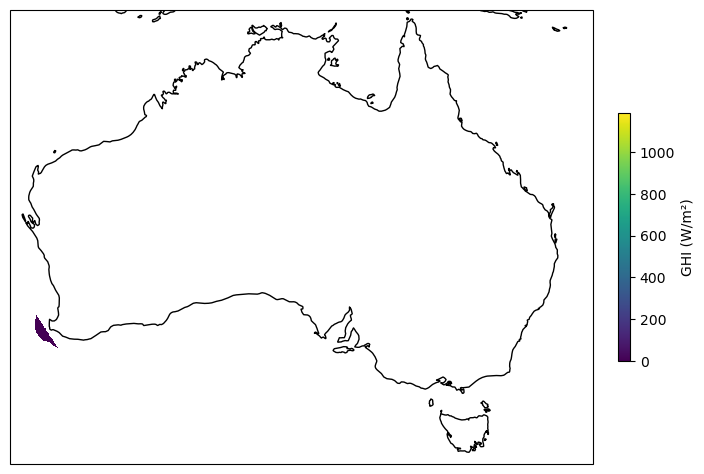

In [3]:
# Setup the figure and axis
da = ds.surface_global_irradiance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 6))
mesh = None

# Define init function
def init():
    global mesh
    mesh = ax.pcolormesh(
        da.longitude, da.latitude, da.isel(time=0), 
        shading='auto', cmap='viridis', 
        transform=ccrs.PlateCarree(), vmin=da.min().compute(), vmax=da.max().compute()
    )
    ax.coastlines()
    cbar = fig.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label("GHI (W/m²)")
    return mesh,

# Define update function
def update(frame):
    global mesh
    mesh.set_array(da.isel(time=frame).values.ravel())
    return mesh,

# Create animation
anim = FuncAnimation(
    fig, update, frames=len(da.time), init_func=init, blit=False, interval=200
)

# Save as MP4 or display in Jupyter
anim.save('/home/548/cd3022/aus-historical-solar-droughts/himawari_day.gif', writer=PillowWriter(fps=5))
plt.show()

In [5]:
vic_ds = ds.sel(
    latitude=slice(-38.8, -34),
    longitude=slice(141,149.5)
)

In [ ]:
# Setup the figure and axis
da = vic_ds.surface_global_irradiance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 6))
mesh = None

# Define init function
def init():
    global mesh
    mesh = ax.pcolormesh(
        da.longitude, da.latitude, da.isel(time=0), 
        shading='auto', cmap='viridis', 
        transform=ccrs.PlateCarree(), vmin=da.min().compute(), vmax=da.max().compute()
    )
    ax.coastlines()
    cbar = fig.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label("GHI (W/m²)")
    return mesh,

# Define update function
def update(frame):
    global mesh
    mesh.set_array(da.isel(time=frame).values.ravel())
    return mesh,

# Create animation
anim = FuncAnimation(
    fig, update, frames=len(da.time), init_func=init, blit=False, interval=200
)

# Save as MP4 or display in Jupyter
anim.save('/home/548/cd3022/aus-historical-solar-droughts/himawari_day_VIC.gif', writer=PillowWriter(fps=5))
plt.show()

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>
